# Credit_Scoring_Model Project

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        42
           1       0.92      0.93      0.93       158

    accuracy                           0.89       200
   macro avg       0.83      0.82      0.83       200
weighted avg       0.88      0.89      0.88       200

ROC-AUC Score: 0.9288728149487644
Confusion Matrix:
 [[ 30  12]
 [ 11 147]]


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.99      0.99       158

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

ROC-AUC Score: 0.9936708860759493
Confusion Matrix:
 [[ 42   0]
 [  2 156]]


--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
         

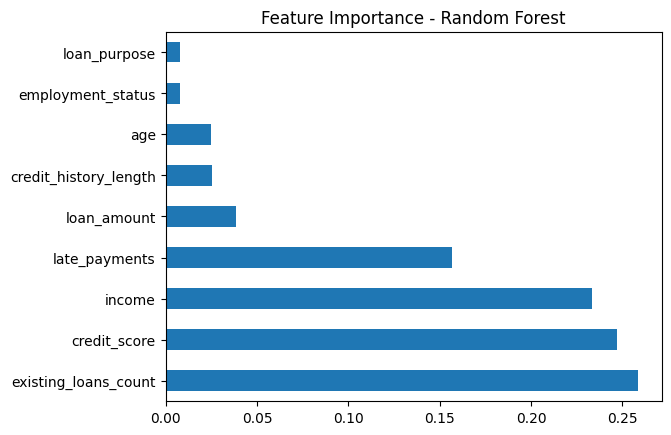

In [ ]:

# Credit_Scoring_Model Project

## 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
df = pd.read_csv('credit_data.csv')
df.head()

## 3. Encode Categorical Features
label_cols = ['employment_status', 'loan_purpose']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

## 4. Split Data
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

## 7. Feature Importance (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.show()
